# 콘크리트 강도

In [1]:
import pandas as pd 
c_df = pd.read_csv('../new/concrete.csv')
c_df

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...,...
5402,5402,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3,15.42
5403,5403,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180,49.20
5404,5404,295.8,0.0,0.0,185.7,0.0,1076.2,759.3,28,39.30
5405,5405,376.0,93.4,0.0,162.6,11.5,955.8,662.9,28,39.61


In [2]:
pre_c_df = c_df.drop(labels = ['id'], axis=1)
pre_c_df

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...
5402,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3,15.42
5403,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180,49.20
5404,295.8,0.0,0.0,185.7,0.0,1076.2,759.3,28,39.30
5405,376.0,93.4,0.0,162.6,11.5,955.8,662.9,28,39.61


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [4]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))


In [5]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 204.1412, RMSE: 14.2878, MSLE: 0.2196, RMSLE: 0.4686, R2: 0.1991


<Axes: >

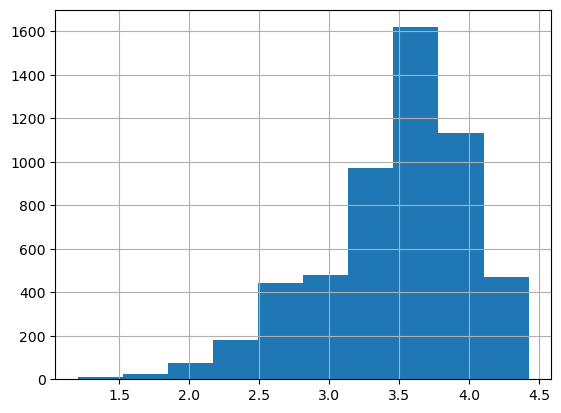

In [9]:
import numpy as np

np.log1p(pre_c_df.Strength).hist()

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [13]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.2130, RMSE: 0.4615, MSLE: 0.0123, RMSLE: 0.1109, R2: 0.1892


In [26]:
# 비선형 회귀 모델 확인
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [27]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.1608, RMSE: 0.4010, MSLE: 0.0093, RMSLE: 0.0965, R2: 0.4104


In [28]:
# 이상치 제거를 위한 표준화 작업
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(pre_c_df)
std_pre_c_df = pd.DataFrame(result, columns = pre_c_df.columns)
std_pre_c_df



,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,2.140020,-0.702680,-0.583751,0.049890,-0.721821,1.724109,-2.009960,-0.696447,-1.986604
1,-1.479876,1.323454,2.035299,0.319929,0.683717,-0.324092,-1.628853,-0.339306,-0.525664
2,-0.096355,0.912233,-0.583751,0.033688,-0.721821,1.075944,0.305903,-0.339306,0.306109
3,0.045787,0.208481,-0.583751,2.318215,-0.721821,-0.777807,-1.285856,4.474945,0.408111
4,-1.347209,2.126714,-0.583751,0.373937,-0.721821,-0.733732,0.126782,0.546402,1.606903
...,...,...,...,...,...,...,...,...,...
5402,1.391402,-0.414945,0.863136,-1.246295,1.316209,-0.324092,-0.752306,-0.696447,-1.288818
5403,0.481691,-0.702680,-0.583751,0.968022,-0.721821,-0.233349,0.048020,1.832107,0.838013
5404,-0.031918,-0.702680,-0.583751,0.033688,-0.721821,1.091500,-0.151426,-0.339306,0.419954
5405,0.728071,0.417089,-0.583751,-1.213890,1.298640,-0.469281,-1.376051,-0.339306,0.434538


In [29]:
# 이상치 확인 및 제거
condition = True
error_count = []

for column in std_pre_c_df.columns:
    if std_pre_c_df[column].between(-1.96, 1.96) is True:
        error_count.append(std_pre_c_df[column].between(-1.96, 1.96).count())
    condition &= std_pre_c_df[column].between(-1.96, 1.96)

std_pre_c_df = std_pre_c_df[condition]
std_pre_c_df


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
2,-0.096355,0.912233,-0.583751,0.033688,-0.721821,1.075944,0.305903,-0.339306,0.306109
5,0.481691,-0.702680,-0.583751,0.968022,-0.721821,0.816678,0.048020,-0.639304,0.329528
6,-1.549052,1.737073,-0.583751,0.033688,-0.721821,1.091500,-0.151426,-0.339306,0.210493
8,0.216358,-0.702680,-0.583751,0.968022,-0.721821,-0.233349,0.365609,1.832107,0.549559
11,-0.208174,0.469840,-0.135033,-1.316505,1.245932,0.903532,0.143297,-0.696447,-0.526440
...,...,...,...,...,...,...,...,...,...
5402,1.391402,-0.414945,0.863136,-1.246295,1.316209,-0.324092,-0.752306,-0.696447,-1.288818
5403,0.481691,-0.702680,-0.583751,0.968022,-0.721821,-0.233349,0.048020,1.832107,0.838013
5404,-0.031918,-0.702680,-0.583751,0.033688,-0.721821,1.091500,-0.151426,-0.339306,0.419954
5405,0.728071,0.417089,-0.583751,-1.213890,1.298640,-0.469281,-1.376051,-0.339306,0.434538


In [30]:
# 이상치 제거한 데이터를 인덱스 번호에 맞게 가져오기
pre_c_df = pre_c_df.iloc[std_pre_c_df.index].reset_index(drop=True)
pre_c_df

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,3.636533
1,350.0,0.0,0.0,203.0,0.0,1055.0,775.0,7,3.648838
2,135.7,203.5,0.0,185.7,0.0,1076.2,759.3,28,3.586293
3,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,3.764451
4,277.2,97.8,24.5,160.7,11.2,1061.7,782.5,3,3.199081
...,...,...,...,...,...,...,...,...,...
3482,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3,2.798500
3483,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180,3.916015
3484,295.8,0.0,0.0,185.7,0.0,1076.2,759.3,28,3.696351
3485,376.0,93.4,0.0,162.6,11.5,955.8,662.9,28,3.704014


In [37]:
# 비선형 회귀 모델 확인
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [38]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.1608, RMSE: 0.4010, MSLE: 0.0093, RMSLE: 0.0965, R2: 0.4104


In [40]:
# OLS 수치 확인
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:               Strength   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          3.594e+04
Date:                Sat, 11 May 2024   Prob (F-statistic):                        0.00
Time:                        02:52:20   Log-Likelihood:                         -1625.3
No. Observations:                3487   AIC:                                      3267.
Df Residuals:                    3479   BIC:                                      3316.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [42]:
pre_c_df.corr()['Strength'].sort_values(ascending=False)[1:]

AgeInDays                    0.407413
SuperplasticizerComponent    0.185487
CementComponent              0.118258
BlastFurnaceSlag             0.072240
FlyAshComponent              0.064211
CoarseAggregateComponent    -0.088199
FineAggregateComponent      -0.096795
WaterComponent              -0.120557
Name: Strength, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


for i in range(7):
    pca = PCA(n_components=(i+1))

    pca_train = pca.fit_transform(features)

    print(pca.explained_variance_ratio_.sum(), i)

0.38477456991494446 0
0.6180065687926732 1
0.7787187981815595 2
0.8796901147144154 3
0.9525485194251566 4
0.9952299815185218 5
0.9997586599433137 6


In [54]:
# 파이프라인 구축 후 차원 축소 후 선형 회귀 분석
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

features, targets = pre_c_df.iloc[:,:-1], pre_c_df.iloc[:,-1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=321)

pipe = Pipeline(
    [
        ('pca', PCA(n_components=3)),
        ('l_r',LinearRegression())
    ]
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=3)), ('l_r', LinearRegression())])

In [55]:
prediction = pipe.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.1935, RMSE: 0.4399, MSLE: 0.0102, RMSLE: 0.1011, R2: 0.0314


array([[<Axes: title={'center': 'CementComponent'}>,
        <Axes: title={'center': 'BlastFurnaceSlag'}>,
        <Axes: title={'center': 'FlyAshComponent'}>],
       [<Axes: title={'center': 'WaterComponent'}>,
        <Axes: title={'center': 'SuperplasticizerComponent'}>,
        <Axes: title={'center': 'CoarseAggregateComponent'}>],
       [<Axes: title={'center': 'FineAggregateComponent'}>,
        <Axes: title={'center': 'AgeInDays'}>,
        <Axes: title={'center': 'Strength'}>]], dtype=object)

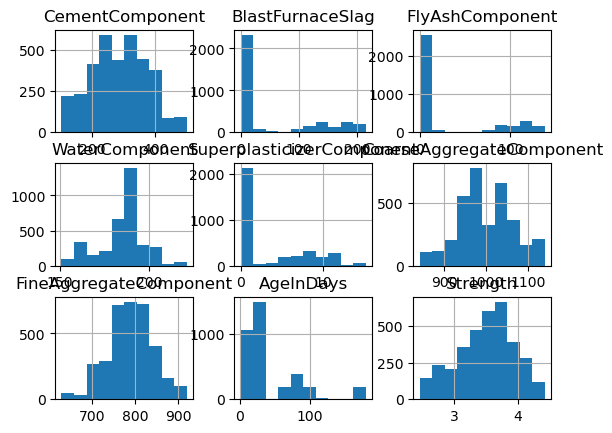

In [59]:
pre_c_df.hist()

In [63]:
# 파이프라인 구축 후 차원 축소 후 선형 회귀 분석
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

features, targets = pre_c_df.iloc[:,:-1], pre_c_df.iloc[:,-1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features,targets, test_size=0.2, random_state=321)

pipe = Pipeline(
    [
        ('min_max', MinMaxScaler()),
        ('l_r',LinearRegression())
    ]
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('min_max', MinMaxScaler()), ('l_r', LinearRegression())])

In [64]:
prediction = pipe.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.1069, RMSE: 0.3270, MSLE: 0.0055, RMSLE: 0.0739, R2: 0.4649
